<a href="https://colab.research.google.com/github/elvispletsch/bibliotecapandas/blob/main/Case_Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
upload = files.upload()

Saving MKT (1).csv to MKT (1).csv


In [3]:
base = pd.read_csv("MKT (1).csv") #nomeando a nossa base como base
base.head() #trazendo a vizualização da base

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
base.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
base.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [8]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio
#instalando os pacotes de gráficos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00


In [9]:
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [10]:
base.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

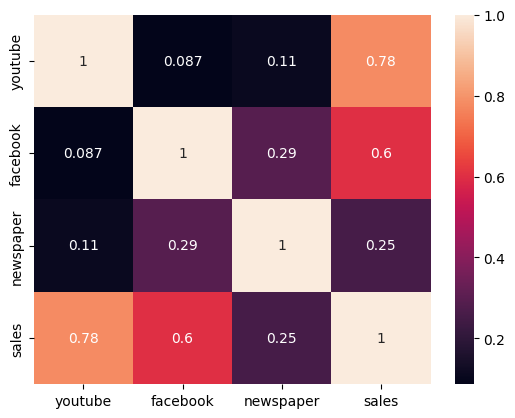

In [11]:
sns.heatmap(base.corr(), annot=True)

<Axes: xlabel='sales', ylabel='Count'>

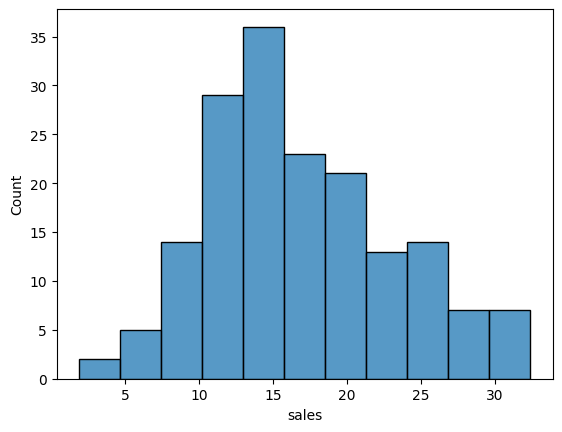

In [13]:
sns.histplot(base["sales"])

<Axes: xlabel='youtube', ylabel='Count'>

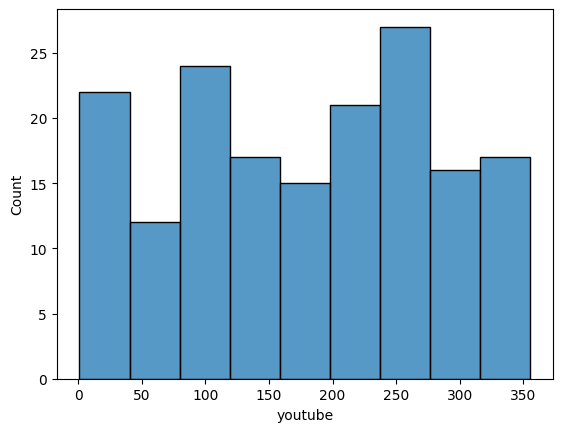

In [14]:
sns.histplot(base["youtube"])

In [16]:
X = base[['youtube', 'facebook', 'newspaper']]

Y = base[['sales']]



In [20]:
from sklearn.model_selection import train_test_split #trazendo uma biblioteca para "aprender"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42) #configurando o algoritmo a aprender 0.7 (70% dos dados de X e Y)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [23]:
lm.fit(X_train, Y_train)

LinearRegression()

In [24]:
y_pred = lm.predict(X_test)


In [25]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)
print("r_quadrado", r) # representa que tenho 88% de que quando as variaveis explicativas mudarem, minha variavel mudar.

r_quadrado 0.882423505618885


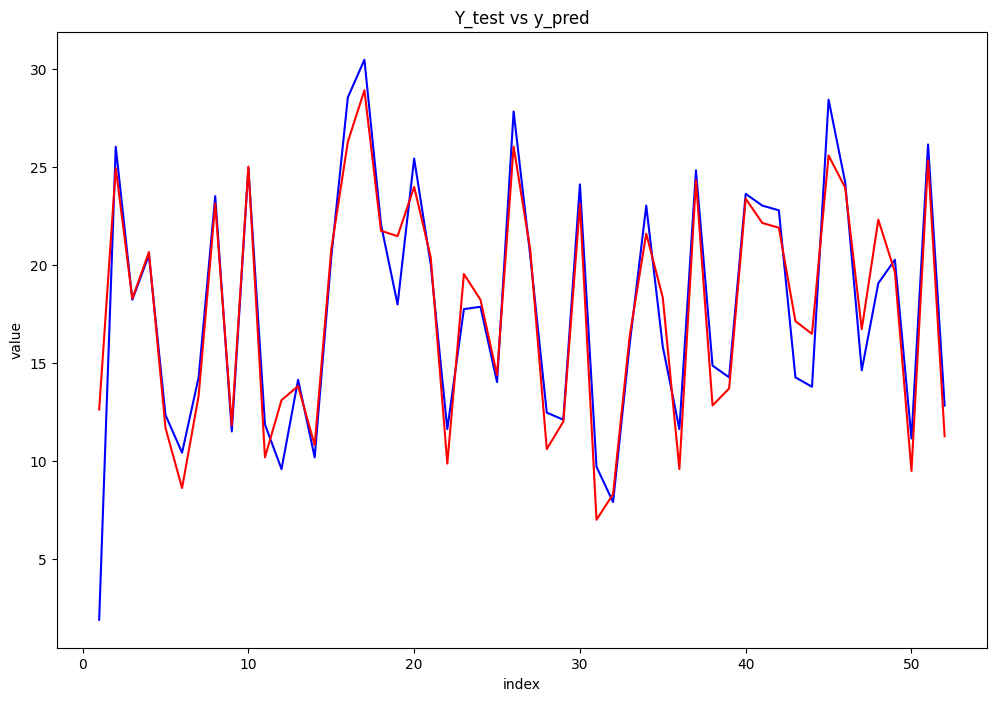

In [34]:
import matplotlib.pyplot as plt
c = [i for i in range(1, 53)]  # Ajuste para 52 valores
fig = plt.figure(figsize=(12,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Y_test vs y_pred")
plt.show()


In [36]:
#Premissa de predição de qual serão as vendas baseado nos investimentos abaixo

youtube = 200
facebook= 30
newspaper = 40
Entrada = [[youtube, facebook, newspaper]]
lm.predict(Entrada)[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([18.34617774])